In [1]:
import matplotlib.pyplot as plt
import torch

from blocks import Log2Block, Log10Block, LnBlock, SinBlock, Pow2Block, LinearBlock, InverseBlock, BiasBlock
from model import ModelFactory, MultiLayerModelFactory

### Nguyen-7

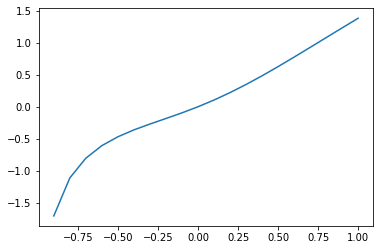

In [43]:
def nguyen_7(x: torch.Tensor):
    return torch.log(x + 1) + torch.log(x**2 + 1)

x = torch.arange(-1, 1.01, 0.1, dtype=torch.float32).unsqueeze(-1)
y = nguyen_7(x)

plt.plot(x, y)

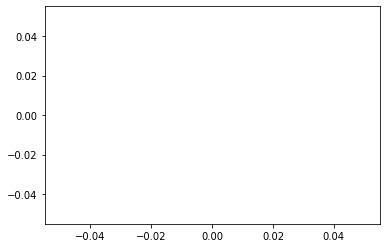

In [47]:
model = MultiLayerModelFactory(x, y, max_size=4, layers=2, log_mode="symmetric").from_class_list([SinBlock, LinearBlock, LnBlock, Pow2Block])
plt.plot(x.numpy(), model(x).detach().numpy())
plt.show()

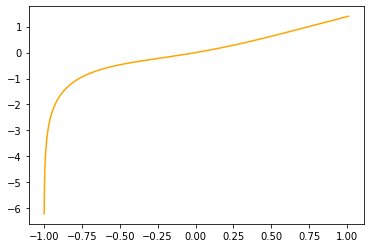

In [48]:
x_test = torch.arange(-1, 1.01, 0.001, dtype=torch.float32).unsqueeze(-1)
y_test = nguyen_7(x_test)

plt.plot(x_test, y_test, color="orange")

y_test = model(x_test).detach()
plt.plot(x_test, y_test, color="blue")

In [49]:
model.str('x1')

'(sin((sin(x) * nan + x * 0.4311 + ln(x) * nan + (x) ^ 2 * nan)) * nan + (sin(x) * nan + x * 0.4818 + ln(x) * nan + (x) ^ 2 * nan) * 0.5375 + ln((sin(x) * nan + x * 0.1674 + ln(x) * nan + (x) ^ 2 * nan)) * nan + ((sin(x) * nan + x * 0.5437 + ln(x) * nan + (x) ^ 2 * nan)) ^ 2 * nan) * 0.0592'